In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("train.csv")

df_scaled = df.drop("SalePrice" ,axis=1)#scaled data
#df_scaled = df

df.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,7,1820,1,240,1026,1133,2,8,1925,1950,184000
1,7,1646,1,240,918,918,2,7,1941,1950,164000
2,5,1316,2,484,926,926,1,6,1929,2001,130000
3,10,2402,3,672,3094,2402,2,10,2008,2008,555000
4,7,1253,2,402,1237,1253,2,6,1995,1996,176000


In [4]:
m,n=df_scaled.shape
print(m, n)

1168 10


In [5]:
#standardization Scaling 
"""
for i in range(n):
    x= df.iloc[:, i]
    mean_value = x.mean()
    std_deviation = abs(x.std())
    stanadardized_x = (x - mean_value) / std_deviation
    df_scaled.iloc[:,i]= stanadardized_x

df_stanadardized.head()

"""
#Min Max Scaling
for i in range(n):    
    series = df.iloc[:, i]
    
    # Min-Max Scaling (Normalization)
    min_value = series.min()
    max_value = series.max()
    df_scaled.iloc[:,i] = (series - min_value) / (max_value - min_value)



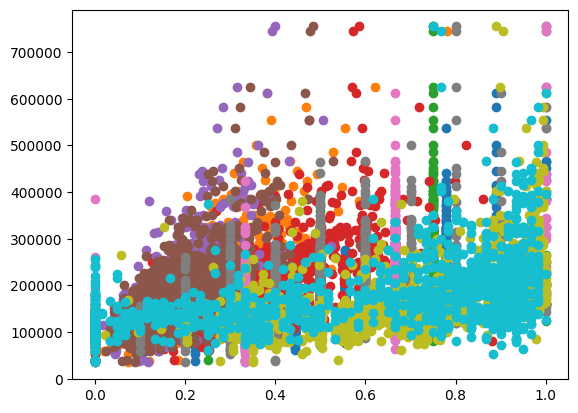

In [6]:
Y = df.iloc[:, n]
X = df_scaled.to_numpy()

for i in range(n):
    plt.scatter(df_scaled.iloc[:, i], Y)

In [13]:
w = np.zeros(n) #parameter vector
b=0

alpha = 0.05 #learniing rate

epochs = 100 #number of iterations

Cost=np.zeros(epochs)
iter = np.linspace(0, epochs-1, epochs)

for i in range(epochs):
    Y_pred = pd.Series(np.zeros(m))#a pandas series 
    Y_pred = np.dot(X, w) + b * pd.Series(np.ones(m))
    D_w = (1/m)*np.sum(Y_pred- Y)*X
    D_b = (1/m)*np.sum(Y_pred- Y)

    cost = (1/(2*m))*np.sum(pow(Y_pred-Y, 2))
    Cost[i]= cost
    
    w = w - alpha * D_w[1]
    b = b - alpha * D_b

print(w, b)

[46607.15210226 17280.11969428 17477.68203835 11832.56329818
 10503.77224956  9368.48674658 46607.15210226 34955.36407669
 35210.51271959     0.        ] 69910.7281533898


In [14]:
print(Y_pred, Y)
cost = (1/(2*m))*np.sum(pow(Y_pred-Y, 2))
print(cost)

0       181339.575378
1       180741.906954
2       153631.509061
3       245719.769532
4       196835.348542
            ...      
1163    170327.237476
1164    197579.865423
1165    146451.468377
1166    170037.801838
1167    194215.580714
Length: 1168, dtype: float64 0       184000
1       164000
2       130000
3       555000
4       176000
         ...  
1163    149500
1164    160000
1165    115000
1166    165500
1167    180500
Name: SalePrice, Length: 1168, dtype: int64
1764708673.3700225


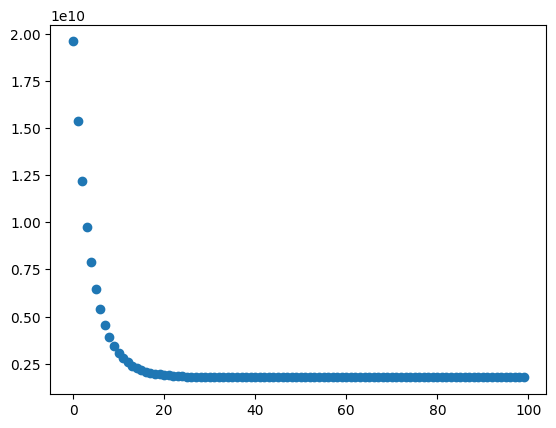

In [17]:
plt.scatter(iter, Cost)
plt.show()

In [18]:
df_test = pd.read_csv("test.csv")
df_test_scaled = df_test.drop("SalePrice" ,axis=1)
df_test.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,8,1970,3,753,1085,1120,2,8,2006,2006,281000
1,6,1632,1,338,1240,1632,2,6,1958,1988,139000
2,7,1223,2,480,600,520,2,4,2005,2005,147400
3,5,1559,2,812,1559,1559,1,5,1948,1973,153500
4,4,630,1,286,630,630,1,3,1970,2002,86000


In [19]:
m_test, n_test= df_test_scaled.shape
print(m_test, n_test)

292 10


In [20]:
for i in range(n_test-1):    
    series = df_test.iloc[:, i]
    
    # Min-Max Scaling (Normalization)
    min_value = series.min()
    max_value = series.max()
    df_test_scaled.iloc[:,i] = (series - min_value) / (max_value - min_value)

In [21]:
Y_test = df_test.iloc[:,n_test]
X_test = df_test_scaled.to_numpy()

print(X_test.shape, Y_test.shape)

(292, 10) (292,)


In [22]:
df_test_scaled.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,0.777778,0.476343,0.75,0.541727,0.339062,0.261905,0.666667,0.454545,0.969231,2006
1,0.555556,0.368286,0.25,0.243165,0.387500,0.441176,0.666667,0.272727,0.600000,1988
2,0.666667,0.237532,0.50,0.345324,0.187500,0.051821,0.666667,0.090909,0.961538,2005
3,0.444444,0.344949,0.50,0.584173,0.487187,0.415616,0.333333,0.181818,0.523077,1973
4,0.333333,0.047954,0.25,0.205755,0.196875,0.090336,0.333333,0.000000,0.692308,2002


In [23]:
Y_pred_test = pd.Series(np.zeros(m_test))#a pandas series 
Y_pred_test = np.dot(X_test, w) + b * pd.Series(np.ones(m_test))
print(Y_pred_test, Y_test)

0      221012.705926
1      179348.706724
2      188472.046231
3      161556.922997
4      135905.599228
           ...      
287    175047.213419
288    153980.156109
289    166523.647482
290    199456.839433
291    198169.166158
Length: 292, dtype: float64 0      281000
1      139000
2      147400
3      153500
4       86000
        ...  
287    158000
288    118000
289    140000
290    159895
291    178900
Name: SalePrice, Length: 292, dtype: int64


In [24]:
cost = (1/(2*m_test))*sum(pow(Y_pred_test-Y_test, 2))
print(cost)

1498143499.04708


In [25]:
error = Y_pred_test - Y_test
print(error)

0     -59987.294074
1      40348.706724
2      41072.046231
3       8056.922997
4      49905.599228
           ...     
287    17047.213419
288    35980.156109
289    26523.647482
290    39561.839433
291    19269.166158
Length: 292, dtype: float64


In [26]:
error_percentage = error * 100 / Y_test

In [29]:
sum=0
for i in range(m_test):
    sum+=error_percentage[i]
average_accuracy_percentage = 100 -sum/m_test

print(average_accuracy_percentage)

88.49319490477292
